In [49]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from os import walk

testpath = 'imagens_vq/teste'
testfiles = next(walk(testpath), (None, None, []))[2]

trainpath = 'imagens_vq/treino'
trainfiles = next(walk(trainpath), (None, None, []))[2]

recpath = 'imagens_vq/rec'
recfiles = next(walk(recpath), (None, None, []))[2]

Populating the interactive namespace from numpy and matplotlib


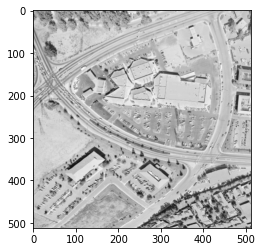

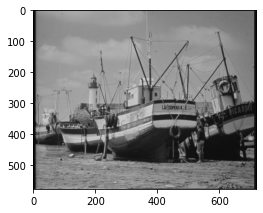

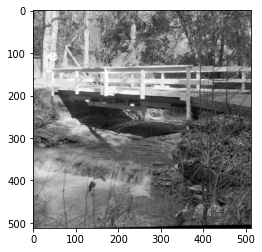

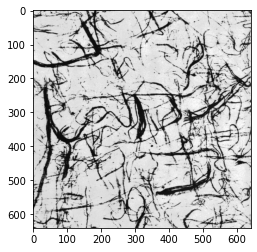

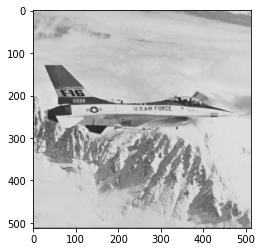

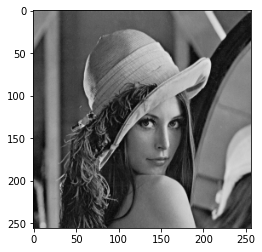

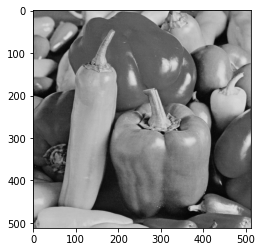

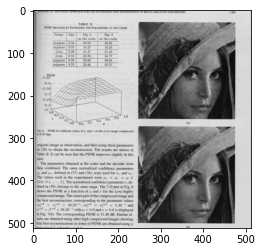

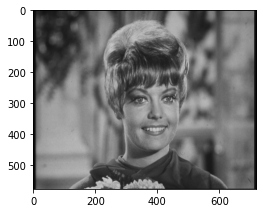

In [50]:
for i in range(0, len(trainfiles)):
    f, axarr = plt.subplots(1,1)
    f.set_figheight(4)
    f.set_figwidth(4)
    img = mpimg.imread(trainpath + '/' + trainfiles[i])
    axarr.imshow(img, cmap='gray', vmin=0, vmax=255)
    plt.show()

In [51]:
import csv
p_df = csv.reader(open("BestCDBK.csv"))
params = []
blocks = [1, 2, 2, 4];
for row in p_df:
    params.append(row[0:2])

params = np.array(params).astype(float)
params = params.astype(int)

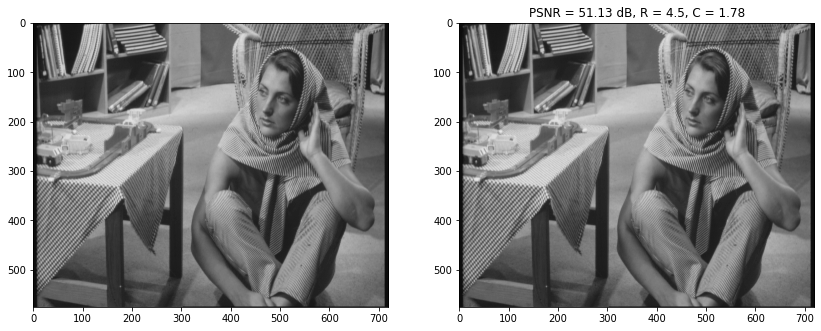

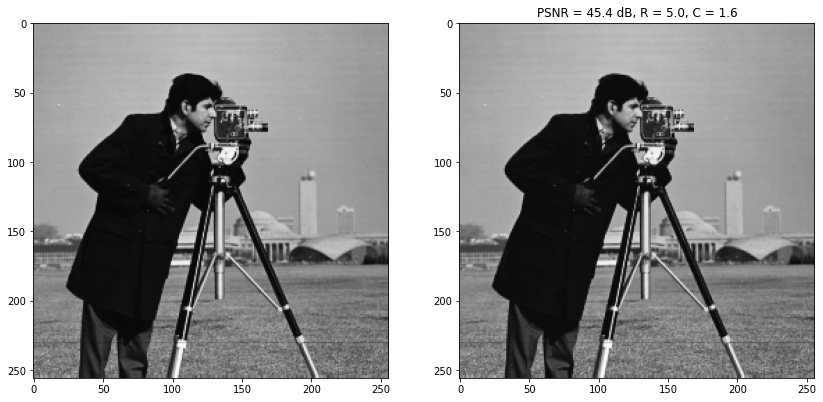

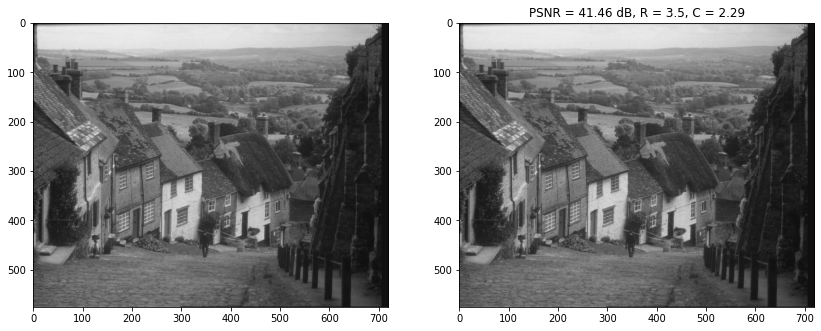

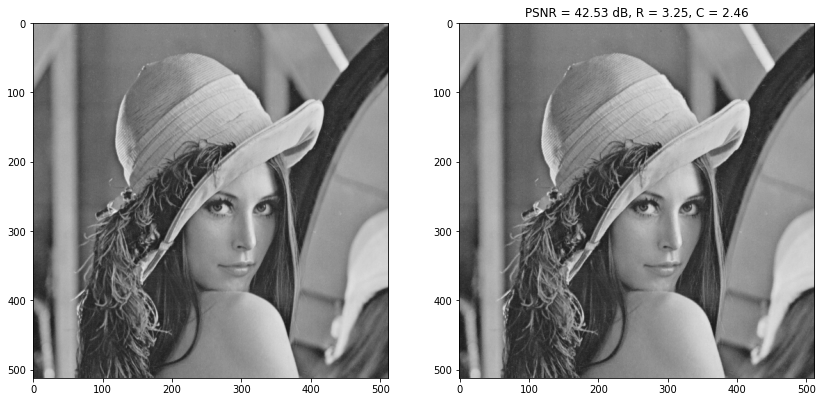

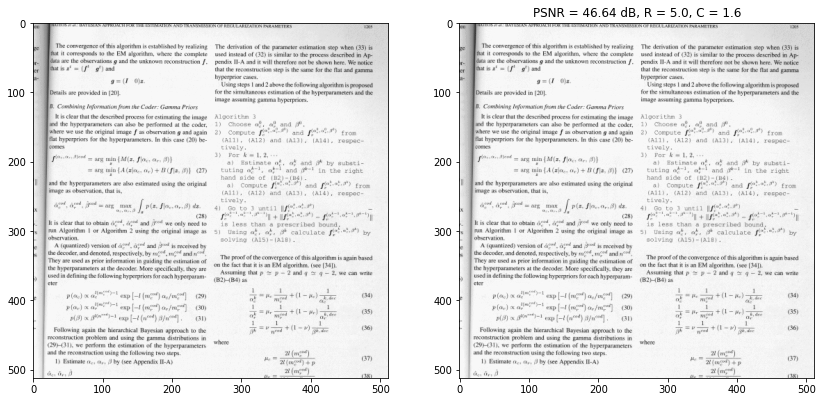

In [56]:
import cv2
for i in range(0, len(testfiles)):
    
    f, axarr = plt.subplots(1,2)
    
    f.set_figheight(14)
    f.set_figwidth(14)
    imgp1 = cv2.imread(testpath + '/' + testfiles[i])
    imgp2 = cv2.imread(recpath + '/' + recfiles[i])
    psnr = cv2.PSNR(imgp1, imgp2)
    img = mpimg.imread(testpath + '/' + testfiles[i])
    axarr[0].imshow(img, cmap='gray', vmin=0, vmax=255)
    img2 = mpimg.imread(recpath + '/' + recfiles[i])
    axarr[1].imshow(img2, cmap='gray', vmin=0, vmax=255)
    R = log2(params[i, 1])/blocks[params[i, 0]]
    plt.title("PSNR = " + str(round(psnr,2)) +  " dB, R = " + str(R) + ", C = " + str(round(8/R, 2)))
    plt.show()